In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1669,5405-ZMYXQ,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.60,548.9,No
5961,2049-BAFNW,Female,0,No,No,1,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Mailed check,35.90,35.9,No
5019,3320-VEOYC,Male,1,No,No,14,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.60,1273.3,No
2065,5153-RTHKF,Female,0,No,No,34,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,85.35,2896.6,No
1737,8887-IPQNC,Female,0,Yes,No,7,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,44.25,313.45,No


In [4]:
df.drop('customerID',axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#there is an issue with total Charges so we change it into float value
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
 #this will show the rows in which TotalCharges is null.
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]
#Now we identify those rows so we saved those rows and then drop them. 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
#So now we are deleting those rows and saving the dataframe in new df1
df1 = df[df.TotalCharges!=' '] #so it will keep other values which are not null
df1.shape

(7032, 20)

In [8]:
df1.dtypes
#Now make it in float
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\abbas\AppData\Local\Temp\ipykernel_9276\1532359433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

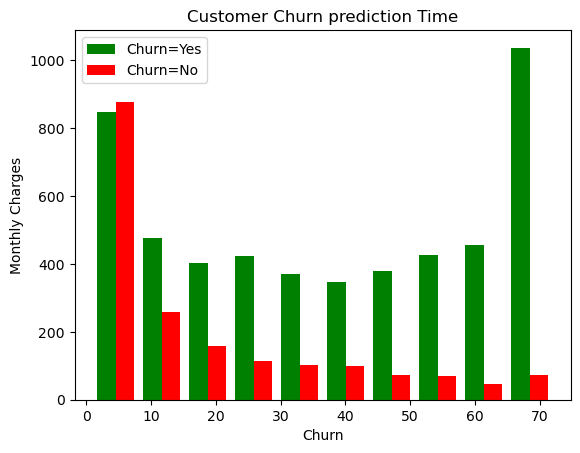

In [10]:
#Visulaization for Tenure
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.title("Customer Churn prediction Time")
plt.ylabel("Monthly Charges")
plt.xlabel("Churn")

plt.hist([tenure_churn_no, tenure_churn_yes], color=['green', 'red'], label=['Churn=Yes','Churn=No'])
plt.legend()

In [11]:
#in for loop now we know that each column have which values like gender= yes/no, partner= yes/no and so on
#So now for machine learning model we have to do label encoding only for those which have yes/no, and contract = 'month-to-month' 'One year'
def print_unique_col_values(df1):
    for col in df1:
        if df1[col].dtypes=='object':
            print(f"{col} : {df1[col].unique()}") #It will print all the column which has unique values

In [12]:
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


C:\Users\abbas\AppData\Local\Temp\ipykernel_9276\2332729644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No', inplace=True)
C:\Users\abbas\AppData\Local\Temp\ipykernel_9276\2332729644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace=True)


In [13]:
#Now changing Yes/No into 0 and 1.
yes_no_columns = ['Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

C:\Users\abbas\AppData\Local\Temp\ipykernel_9276\633578647.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)
C:\Users\abbas\AppData\Local\Temp\ipykernel_9276\633578647.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1

In [14]:
for col in df1:
    print(f"{col} : {df1[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [15]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

C:\Users\abbas\AppData\Local\Temp\ipykernel_9276\3771459934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
C:\Users\abbas\AppData\Local\Temp\ipykernel_9276\3771459934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].

In [16]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [17]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [18]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5119,1,0,0,0,5,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
3409,1,1,1,0,70,1,1,1,1,1,...,False,True,False,False,False,True,False,False,True,False
2860,0,1,0,0,67,1,1,0,0,1,...,False,True,False,True,False,False,False,True,False,False
168,0,1,1,0,58,0,0,0,1,1,...,True,False,False,True,False,False,False,False,True,False
1708,0,0,0,0,4,1,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False


In [19]:
#for scalling we use min max scaling which set value between 0 & 1.
#The values should be scaled for better algorithm results
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [20]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [21]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [22]:
y_train.value_counts()

Churn
0.0    4130
1.0    1495
Name: count, dtype: int64

In [23]:
y_test.value_counts()

Churn
0.0    1033
1.0     374
Name: count, dtype: int64

In [24]:
X_train.shape

(5625, 26)

In [25]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
2446,1,0,0,0,0.239437,1,1,0,1,0,...,False,True,False,True,False,False,False,True,False,False
1680,0,0,1,1,0.774648,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
2220,0,0,1,0,1.000000,1,0,1,1,0,...,True,False,False,False,False,True,True,False,False,False
2842,1,0,0,0,0.042254,0,0,1,0,1,...,True,False,False,True,False,False,False,False,False,True
5131,1,0,1,0,0.605634,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
4372,0,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
4687,0,0,1,0,0.295775,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
2385,1,0,0,1,0.028169,0,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
6773,0,1,1,0,0.507042,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [29]:
# from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [65]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=50)
    else:
        model.fit(X_train, y_train, epochs=50, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [31]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7258 - loss: 0.5568
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7913 - loss: 0.4313
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7996 - loss: 0.4113
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7865 - loss: 0.4334
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7857 - loss: 0.4297
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8086 - loss: 0.4152
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8024 - loss: 0.4126
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7990 - loss: 0.4060
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8036 - loss: 0.4087
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8091 - loss: 0.4040
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8027 - loss: 0.4076
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [32]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [35]:
count_class_0, count_class_1

(5163, 1869)

## Imbalanced Data
Here we use some algorithms that our model should predict values precisely.
And also we improve f1-score 

In [33]:
df_class_0.shape #So here we see imbalanced data because in one class with label 0. has 5163 samples but another with label 1 has just 1869 sample

(5163, 27)

In [34]:
df_class_1.shape

(1869, 27)

In [39]:
#So for that we will under sample df_class_0 to matched with sample of df_class_1
df_class_0_under = df_class_0.sample(count_class_1)
#So now we have a new data set having same Samples 1869 and 1869
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print("Random under-sampling")
print(df_test_under.Churn.value_counts())

Random under-sampling
Churn
0    1869
1    1869
Name: count, dtype: int64


In [43]:
X = df_test_under.drop(['Churn'], axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y) 

In [44]:
y_train.value_counts() #it is equally dividing the values due to stratify=y which make sure that equal number for 0 & 1 labels. 

Churn
0    1495
1    1495
Name: count, dtype: int64

In [45]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6241 - loss: 0.6610
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7436 - loss: 0.5396
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7595 - loss: 0.5007
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7642 - loss: 0.4874
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7565 - loss: 0.4901
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7490 - loss: 0.4935
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7638 - loss: 0.4866
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7630 - loss: 0.4826
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7614 - loss: 0.4843
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7562 - loss: 0.4651
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7718 - loss: 0.4663
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7763 - lo

## Method2 OverSampling

In [46]:
count_class_0, count_class_1

(5163, 1869)

In [57]:
#so for now i will create class 1 which 1869 values now i will arrange it in a way that the sample of class0 and class1 are same.
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [55]:
df_class_0.shape

(5163, 27)

In [62]:
#Now we have to join df_class_1_over & df_class_0 so that we perform model training.
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape #yes the data is perfectly concatenated.
print("Random Over Sampling ")
print(df_test_over.Churn.value_counts()) #That's it results are okay

Random Over Sampling 
Churn
0    5163
1    5163
Name: count, dtype: int64


In [64]:
X = df_test_over.drop(['Churn'], axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y) 

In [66]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50


C:\Users\abbas\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7030 - loss: 0.5897
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7606 - loss: 0.4990
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7683 - loss: 0.4808
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7702 - loss: 0.4761
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7671 - loss: 0.4814
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7720 - loss: 0.4762
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7715 - loss: 0.4705
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7749 - loss: 0.4681
Epoch 9/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7732 - loss: 0.4599
Epoch 10/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7752 - loss: 0.4578
Epoch 11/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7758 - loss: 0.4596
Epoch 12/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

## Method3: SMOTE
    SMOTE (Synthetic Minority Oversampling Technique) is used to handle class imbalance in datasets by generating synthetic samples for the minority class rather than simply duplicating them. This helps prevent overfitting and improves model performance on underrepresented classes.